/Users/slee/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Adjusted Rand Index (ARI): 0.7302382722834697


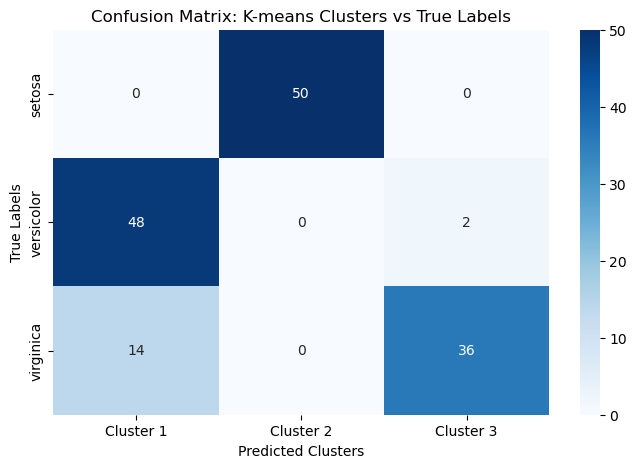

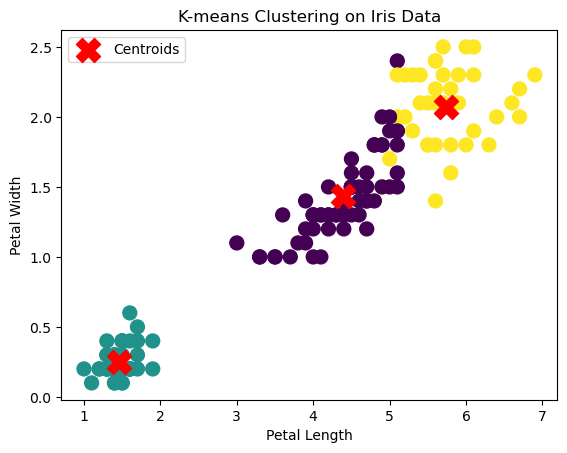

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import load_iris
from sklearn.metrics import silhouette_score, adjusted_rand_score, confusion_matrix
import seaborn as sns

# Load the Iris dataset
iris = load_iris()
X = iris.data
y_true = iris.target

# Apply K-means clustering with k=3
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
labels = kmeans.fit_predict(X)

# Compare clusters with true labels using Adjusted Rand Index (ARI)
ari = adjusted_rand_score(y_true, labels)
print(f"Adjusted Rand Index (ARI): {ari}")

# Confusion matrix to compare clusters with true labels
conf_mat = confusion_matrix(y_true, labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 5))
sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", 
            xticklabels=["Cluster 1", "Cluster 2", "Cluster 3"], yticklabels=iris.target_names)
plt.xlabel("Predicted Clusters")
plt.ylabel("True Labels")
plt.title("Confusion Matrix: K-means Clusters vs True Labels")
plt.show()

# Plot the clusters
plt.scatter(X[:, 2], X[:, 3], c=labels, cmap='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 2], kmeans.cluster_centers_[:, 3], s=300, c='red', marker='X', label='Centroids')
plt.title("K-means Clustering on Iris Data")
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.legend()
plt.show()
